In [15]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('mcdonalds.csv')

In [5]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [9]:
data.shape

(1453, 15)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [12]:
data.Like.value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [14]:
data.VisitFrequency.value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [36]:
data_columns = data.iloc[:,:-3]

In [37]:
data_columns

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4


In [50]:
obj_columns=['yummy', 'convenient', 'spicy', 'fattening', 
             'greasy', 'fast', 'cheap', 'tasty', 'expensive', 
             'healthy', 'disgusting', 'Like', 'VisitFrequency', 'Gender']


In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in obj_columns:
    data[i]=le.fit_transform(data[i])

In [63]:
d = data.iloc[:,:-4]

In [64]:
d

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [65]:
d.describe().T['mean']

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
Name: mean, dtype: float64

In [67]:
from sklearn.decomposition import PCA
pca=PCA()
pca_data=pca.fit_transform(d)

In [68]:
from sklearn.decomposition import PCA
pca=PCA()
pca_data=pca.fit_transform(d)
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [69]:
pca.singular_values_

array([28.84746118, 23.14716582, 19.22858381, 15.19626736, 12.85685762,
       11.82305052, 11.03895052, 10.48355462, 10.10742431,  9.48214684,
        9.02721076])

In [70]:
pca.explained_variance_

array([0.57312398, 0.36900226, 0.2546408 , 0.15904032, 0.11384214,
       0.09627033, 0.08392454, 0.07569209, 0.07035814, 0.06192225,
       0.05612296])

In [71]:
print(pca.components_)

[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.01304117 -0.11307868  0.37593402  0.5

In [72]:
pca.components_.shape

(11, 11)

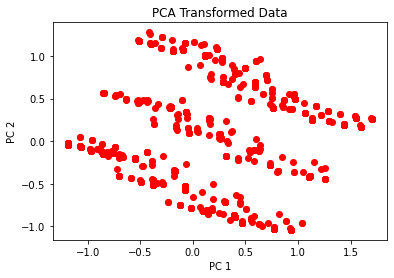

In [74]:
import matplotlib.pyplot as plt
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='red')
plt.title("PCA Transformed Data")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

# Step 5: Extracting Segments


In [75]:
obj_columns=['yummy', 'convenient', 'spicy', 'fattening', 
             'greasy', 'fast', 'cheap', 'tasty', 'expensive', 
             'healthy', 'disgusting', 'Like', 'VisitFrequency', 'Gender']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in obj_columns:
    data[i]=le.fit_transform(data[i])

In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42).fit(data)
kmeans.cluster_centers_

array([[4.23188406e-01, 9.01449275e-01, 1.04347826e-01, 8.31884058e-01,
        4.43478261e-01, 9.01449275e-01, 6.31884058e-01, 5.82608696e-01,
        3.33333333e-01, 1.76811594e-01, 2.75362319e-01, 4.65797101e+00,
        5.36115942e+01, 2.54492754e+00, 4.11594203e-01],
       [6.85618729e-01, 9.13043478e-01, 4.01337793e-02, 8.99665552e-01,
        5.81939799e-01, 8.92976589e-01, 5.95317726e-01, 7.09030100e-01,
        3.81270903e-01, 2.20735786e-01, 2.44147157e-01, 4.44816054e+00,
        3.36454849e+01, 2.77257525e+00, 4.48160535e-01],
       [7.76422764e-01, 9.39024390e-01, 6.09756098e-02, 9.39024390e-01,
        7.60162602e-01, 9.43089431e-01, 6.46341463e-01, 8.13008130e-01,
        3.45528455e-01, 1.70731707e-01, 1.95121951e-01, 4.56910569e+00,
        2.35162602e+01, 2.62195122e+00, 4.71544715e-01],
       [4.06666667e-01, 8.70000000e-01, 1.73333333e-01, 8.16666667e-01,
        4.20000000e-01, 9.10000000e-01, 6.43333333e-01, 5.26666667e-01,
        2.73333333e-01, 2.13333333e-0

In [79]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8] 
clusters_inertia = [] 
s_scores = [] 

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(data)
    clusters_inertia.append(KM_est.inertia_)    
    silhouette_avg = silhouette_score(data, KM_est.labels_)
    s_scores.append(silhouette_avg)

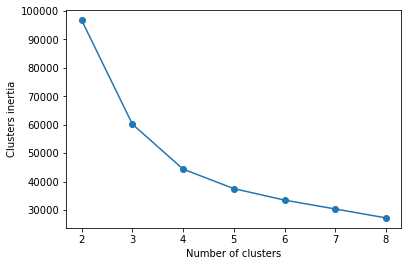

In [82]:
import matplotlib.pyplot as plt
plt.plot(n_clusters, clusters_inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Clusters inertia")
plt.show()

In [84]:
kmeans = KMeans(n_clusters=4, random_state=42,init="k-means++")
kmeans.fit(data)
data['Clusters'] = kmeans.labels_

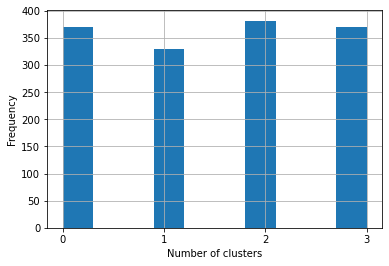

In [85]:
data['Clusters'].hist()
plt.xlabel("Number of clusters")
plt.ylabel("Frequency")
plt.xticks([0,1,2,3])
plt.show()

<AxesSubplot:xlabel='Clusters', ylabel='Age'>

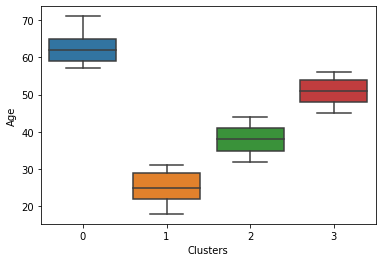

In [88]:
import seaborn as sns

sns.boxplot(x=data['Clusters'], y=data['Age'])